# Kaggle Project

## Wine Quality Dataset(와인 품질 데이터세트) 🍷

**URL:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/
- Data Description(데이터 설명): 포르투갈 "Vinho Verde" 레드 와인의 화학 물질 양과 품질에 대한 데이터를 분석하는 프로젝트로, 품질에 대한 데이터 불균형과 적은 데이터 양이 주요 도전 과제

**Task:**  
장송운 학우님의 프로젝트의 데이터를 사용하였습니다. | Midterm Project [장송운] GitHub: https://github.com/zzzsssy/mid_term_project
  
**연구배경**  
본 프로젝트는 포르투갈의 "Vinho Verde(비뉴 베르데)" `레드와인의 화학 물질 양과 품질에 관한 12개의 변수`로 구성된 레드 와인 1143개 데이터를 딥러닝을 활용하여 와인의 품질을 예측하는 것입니다.  

데이터의 특징은 다음과 같습니다.

- 데이터의 클레스는 균질하지 않습니다.
- 일부 데이터는 이상치가 있습니다.
- 변수 값의 범위가 변수마다 크게 다릅니다.
- 입력 변수와 결과 변수는 선형적이지 않고, 곡선 구조를 가집니다.

**연구문제:**  
본 연구의 핵심 문제는 `클래스 불균질하고 변수 값의 범위가 변수마다 크게 다른 "포르투갈 Vinho Verde(비뉴 베르데) 레드 와인" 품질 데이터를 통해 높고 낮은 품질의 와인을 어떻게 효과적으로 예측할 것`인가입니다. 

작은 연구문제로 나누면 다음과 같습니다.

1. **변수 값의 범위가 서로 다른 변수 처리**: 12개의 화학적 변수가 와인의 품질에 미치는 영향을 분석하고, 이를 효과적으로 모델에 통합하는 방법은 무엇인가?

2. **최적의 딥러닝 모델 구조와 하이퍼파라미터 설정**: 와인 품질을 예측하는데 가장 적합한 딥러닝 모델 구조와 하이퍼파라미터는 무엇인가?  

3. **클래스의 분균질을 고려한 데이터 전처리**: 와인의 품질 분포가 훌륭하거나 불량한 와인보다 평범한 와인에 치우쳐 있으므로, 이러한 불균형을 어떻게 처리할 것인가?


**Datasets**

[Note] 데이터 셋인 `WineQT.csv`을 기반으로 다음과 같은 기준으로 학습/검증/평가 데이터을 준비 하였다.

| Dataset          | Percentage | Number of Data |
|------------------|------------|----------------|
| Train dataset    | 72%        | 822개          |
| Validation dataset | 18%      | 205개          |
| Test dataset     | 10%        | 116개          |
| Total            | 100%       | 1143개         |

**Features(x):**

* Dataset_path: WineQT.csv (1143 rows × 11 columns)
- 모두 연속형 데이터

| Description (Eng)            | Description (Kor)       | Data Type |
|-------------------------------|-------------------------|-----------|
| Fixed Acidity                 | 고정 산도               | float64   |
| Volatile Acidity              | 휘발성 산도             | float64   |
| Citric Acid                   | 시트르산                | float64   |
| Residual Sugar                | 잔류 설탕               | float64   |
| Chlorides                     | 염화물                  | float64   |
| Free Sulfur Dioxide           | 유리 이산화황           | float64   |
| Total Sulfur Dioxide          | 총 이산화황             | float64   |
| Density                       | 밀도                    | float64   |
| pH                            | pH                      | float64   |
| Sulphates                     | 황산염                  | float64   |
| Alcohol                       | 알코올                  | float64   |


**Target(y):**

* DataFrame: csv파일에서 label컬럼이 데이터의 라벨
- 연속형 데이터

| Description (Eng)                    | Description (Kor)               | Data Type |
|--------------------------------------|----------------------------------|-----------|
| Quality (score between 0 and 10)     | 품질 (0에서 10 사이의 점수)       | float64   |



---

## Model Building

### Set-Up

In [41]:
# 환경 구성
try:
    import numpy as np
    import pandas as pd
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.rcParams.update({'font.size': 15}) ## 기본 폰트 크기 설정
    import random
    from glob import glob
    import warnings
    warnings.filterwarnings("ignore") ## deprecated 경고 무시용
    import torch, torchvision
    import torch.nn as nn
    import torch.nn.functional as F
    import torch.optim as optim
    from sklearn.preprocessing import MinMaxScaler
    from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
except:
    %pip install numpy seaborn pandas matplotlib torch

### Data preprocessing

### 데이터 예시 확인

In [42]:
# 데이터 예시 확인
df_data = pd.read_csv("WineQT.csv") 
print(f"[df_data.shape]\n{df_data.shape}\n")
print("[df_data.head()]")
df_data.head()

[df_data.shape]
(1143, 13)

[df_data.head()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### 결측 및 중복 값 처리

In [43]:
print("Null 데이터 확인:", df_data.isnull().sum().sum())

Null 데이터 확인: 0


In [44]:
print("중복 데이터 확인:", df_data[df_data.duplicated()]['quality'].value_counts())

중복 데이터 확인: Series([], Name: count, dtype: int64)


#### 데이터 식별 번호 제거

In [45]:
df_data = df_data.drop(labels='Id', axis=1)
df_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 데이터 고찰

**상관관계**


1. **비선형 구조와 상호작용 학습**:
   - 도수(alcohol)와 휘발성 산도(volatile acidity)는 와인 품질(quality)과 선형성이 있지만, 외의 변수는 비선형적인 구조를 가지고 있다.  
   - 단순히 입력 변수 값이 높거나 낮은 것으로 결정되는 것이 아니라, 품질을 결정하는 각기 달리 결정된다는 것은 변수간의 복잡한 상호작용이 있다.
   - 즉, 각 입력 변수간의 상호작용이 있고, 상호작용에 따라 결정되는 특징이 품질을 결정한다.
   
따라서, 변수간의 상호작용을 잘 학습하는 딥러닝을 적용하는 것이 적합할 것으로 기대한다.  
즉, 변수 간의 상호작용에 대한 특성과 품질을 잘 학습하는 것이 중요



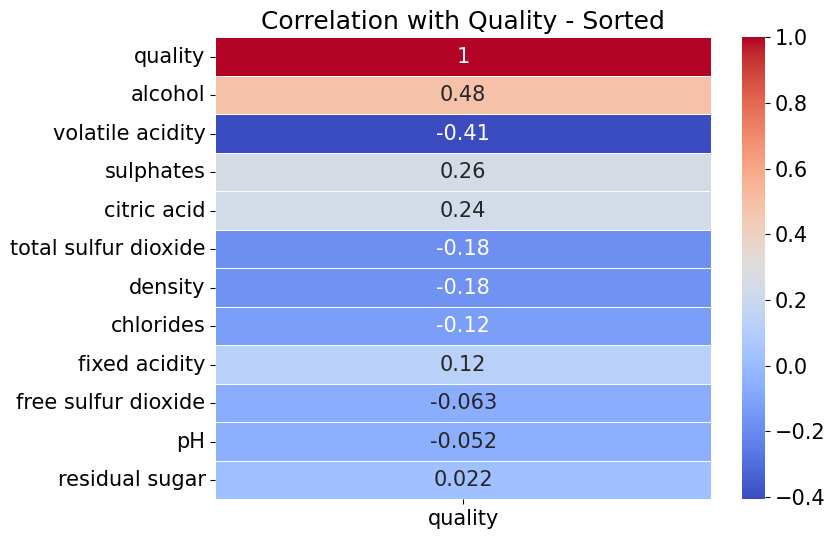

In [46]:
quality_correlation = df_data.corr()[['quality']].sort_values(by='quality', key=abs, ascending=False) ## 'quality' 변수와 다른 변수들 간의 상관관계를 계산하고 정렬함
plt.figure(figsize=(8, 6))
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Quality - Sorted')
plt.show()

#### 데이터 범주화 및 증강
- 증강을 하지 않을 경우 중간 품질에 대한 데이터만 지나치게 학습, 검증, 평가되어 잘못된 일반화 성능이 측정될 수 있다.
> `데이터 증강 없이 학습 할 경우 사실상 val과 Test이 중간 품질에 대해서 더 높은 점수가 나오지만 이것은, 중간 품질 데이터만 두고 중간 품질을 예측하는 활동과 같음으로 잘못 된 것이다.`

- 중간 값(4 ~ 5) 데이터가 많고 그 외는 희소함으로 품질을 하(0), 중(1), 상(2)으로 범주를 다시 할당할 필요성이 있다. 
- 또한, 하와 상 품질 데이터는 다양성을 손상시키지 않는 선에서, 오버 샘플링 하여 데이터의 수를 늘려야 한다.

> `좋은 품질 와인을 낮은 품질로 예측하는 것은 부정 감정을 발생시키지 않지만 낮은 품질 와인을 높은 품질 와인으로 잘못 예측할 경우 크게 부정적`이다. 
- 앞선 관점에서, 낮은 품질의 와인이 좀더 오버 샘플링하여 낮은 품질 데이터를 더 잘 인식시키도록 해야한다. 

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


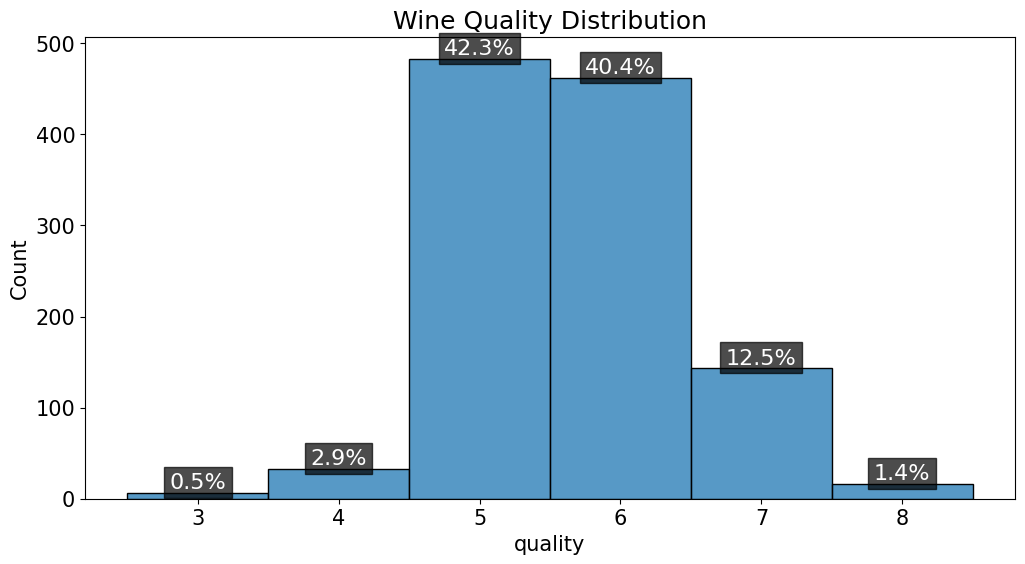

In [47]:
# 기존 데이터 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
print(df_data['quality'].value_counts())
plt.show()


quality
1    945
2    159
0     39
Name: count, dtype: int64


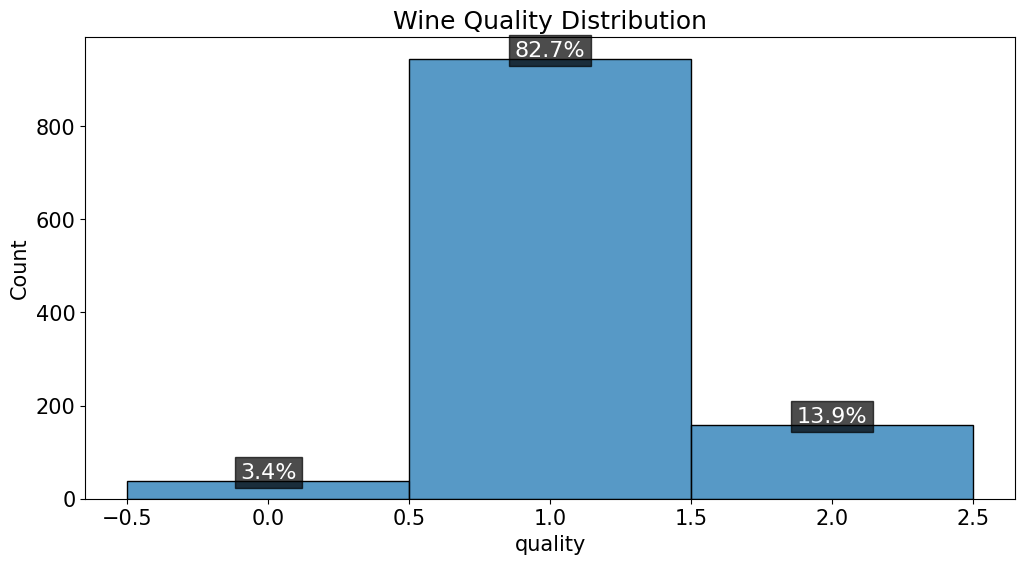

In [48]:
# quality 값에 따라 새로운 범주 값 할당
def categorize_quality(quality):
    if quality in [3, 4]:
        return 0
    elif quality in [5, 6]:
        return 1
    elif quality in [7, 8]:
        return 2
    else:
        return quality 
df_data['quality'] = df_data['quality'].apply(categorize_quality)
print(df_data['quality'].value_counts())

# 범주화 결과 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
plt.show()

quality
1    945
2    400
0    250
Name: count, dtype: int64


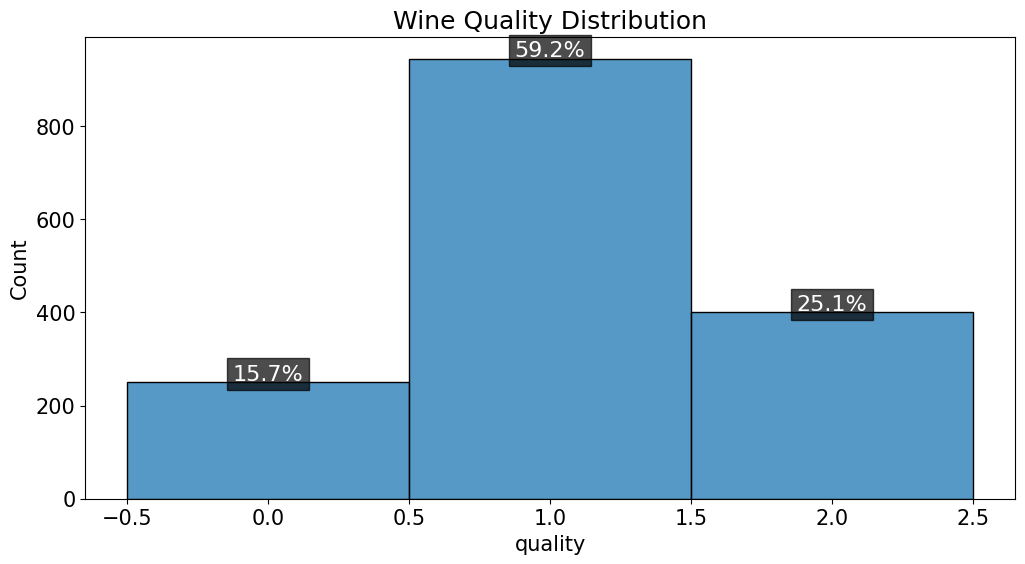

In [49]:
# 소수 0 클래스 오버샘플링
df_minority_oversampled = df_data[df_data['quality'] == 0].sample(250, replace=True)
df_data = pd.concat([df_data[df_data['quality'] != 0], df_minority_oversampled])
# 소수 2 클래스 오버샘플링
df_minority_oversampled = df_data[df_data['quality'] == 2].sample(400, replace=True)
df_data = pd.concat([df_data[df_data['quality'] != 2], df_minority_oversampled])
print(df_data['quality'].value_counts())

# 범주화 결과 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
plt.show()

#### 이상치 제거

**결과 변수 데이터 분포 고찰**  

1. **중간 품질 데이터의 비중이 많음**:
   - 중간 품질 데이터가 많으므로 이상치를 보수적으로 측정할 경우 특징 정보가 사라질 수 있음으로, 이상치 제거 시 조심해야 함

이상치 개수 10


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,0
182,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,1
275,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,1
1111,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,1
339,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,1
1022,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,1
760,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,2
761,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,2
59,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,1


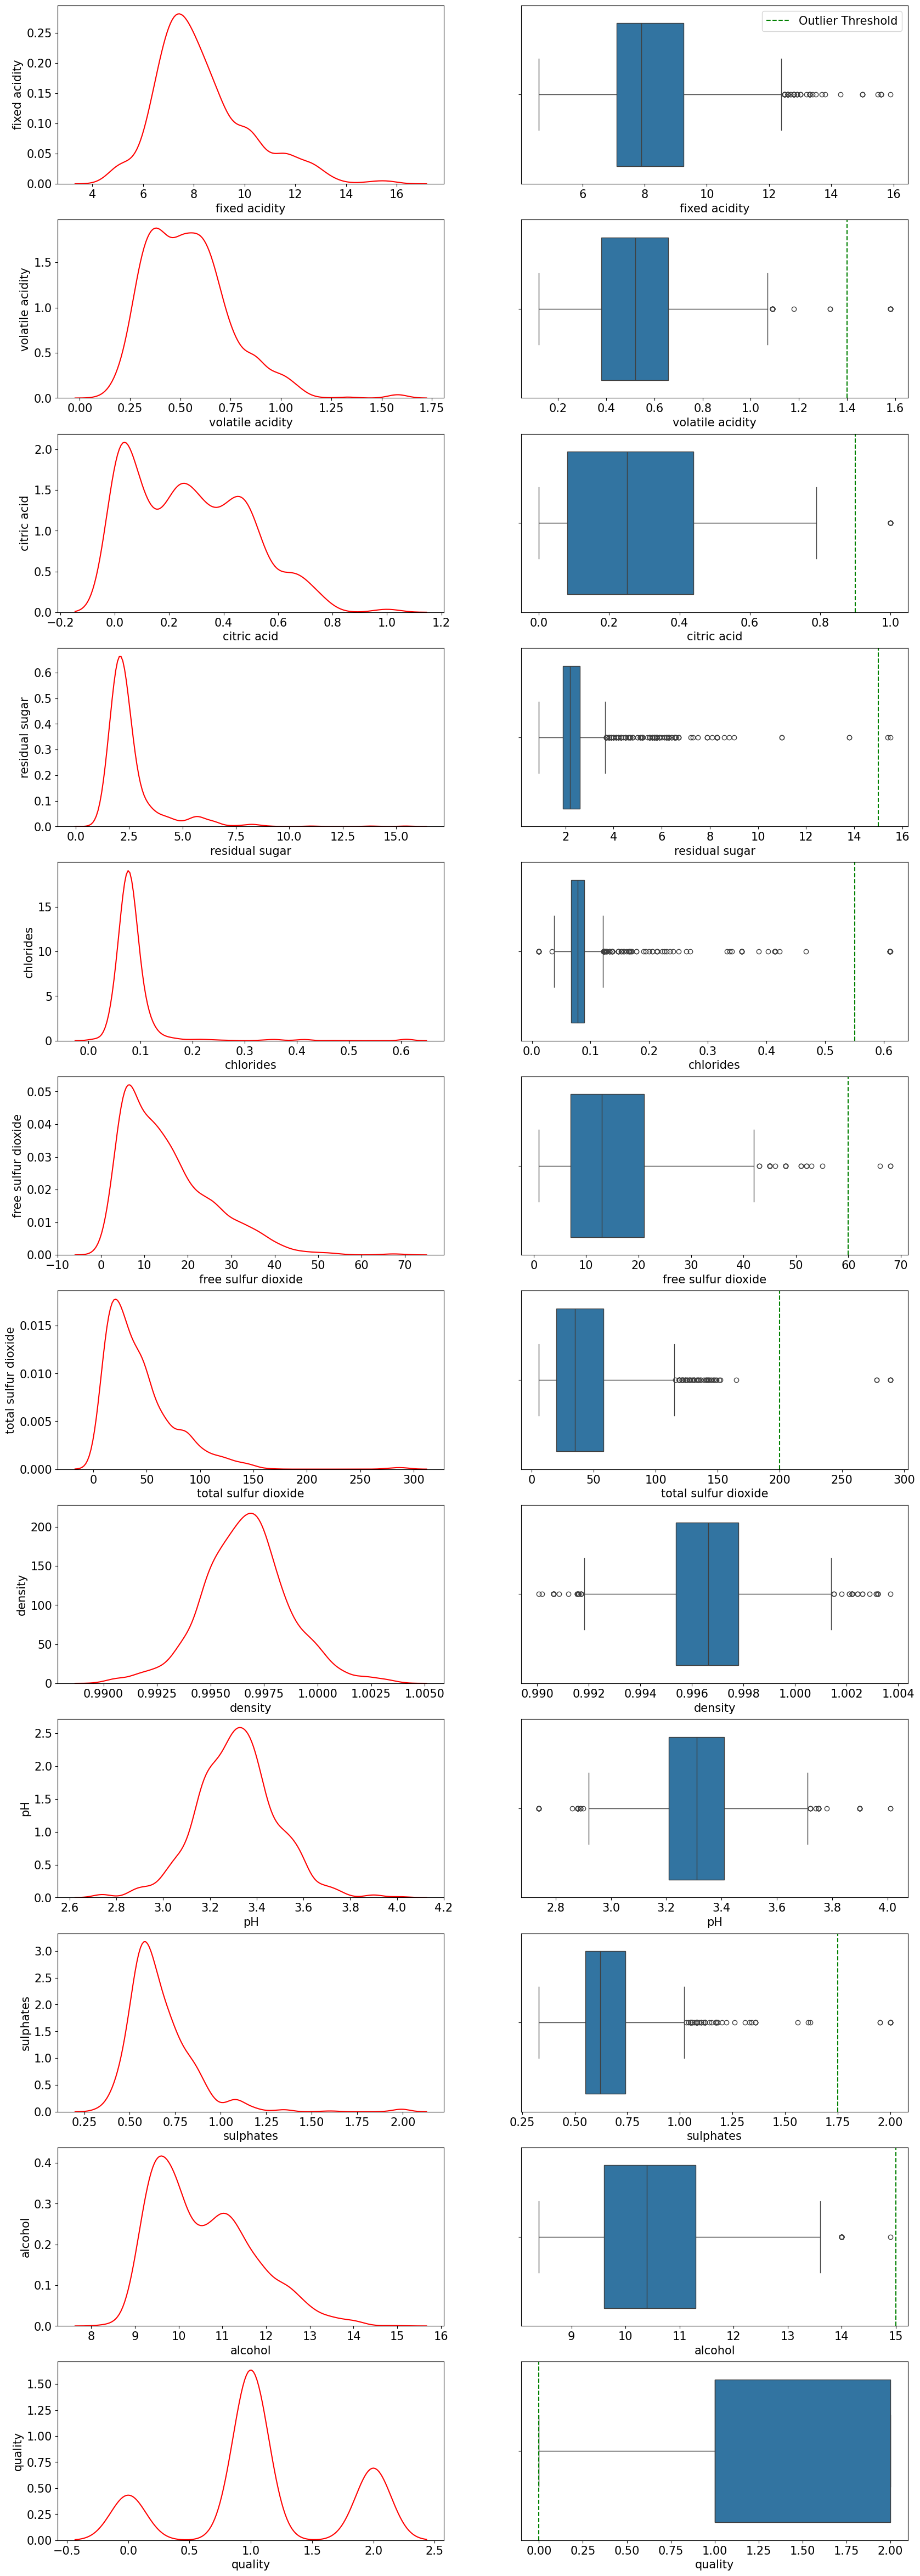

In [50]:
# 이상치 기준 설정
volatile_acidity_threshold = 1.4
citric_acid_threshold = 0.9
chlorides_threshold = 0.55
residual_sugar_threshold = 15
free_sulfur_dioxide_threshold = 60
total_sulfur_dioxide_threshold = 200
sulphates_threshold = 1.75
alcohol_threshold = 15

# 그래프 그리기
fig, axs = plt.subplots(nrows=len(df_data.columns), ncols=2, figsize=(20, 5 * len(df_data.columns)))
for idx, feature in enumerate(df_data.columns):
    axs[idx, 0].set_ylabel(feature)

    # 데이터 분포를 표시
    sns.kdeplot(df_data[feature], color='r', label='data', ax=axs[idx, 0]) ## 히스토그램 스무딩
    sns.boxplot(x=df_data[feature], ax=axs[idx, 1]) ## 박스 플롯 그리기

    # 이상치 기준선 추가
    if feature == 'volatile acidity':
        axs[idx, 1].axvline(volatile_acidity_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'citric acid': 
        axs[idx, 1].axvline(citric_acid_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'chlorides':
        axs[idx, 1].axvline(chlorides_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'residual sugar':
        axs[idx, 1].axvline(residual_sugar_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'free sulfur dioxide':
        axs[idx, 1].axvline(free_sulfur_dioxide_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'total sulfur dioxide':
        axs[idx, 1].axvline(total_sulfur_dioxide_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'sulphates':
        axs[idx, 1].axvline(sulphates_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'alcohol':
        axs[idx, 1].axvline(alcohol_threshold, color='g', linestyle='--', label='Outlier Threshold')

outliers = df_data.loc[df_data['volatile acidity'] > volatile_acidity_threshold]
outliers = pd.concat([outliers, df_data.loc[df_data['citric acid'] > citric_acid_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['chlorides'] > chlorides_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['free sulfur dioxide'] > free_sulfur_dioxide_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['residual sugar'] > residual_sugar_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['total sulfur dioxide'] > total_sulfur_dioxide_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['sulphates'] > sulphates_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['alcohol'] > alcohol_threshold]], axis=0)
df_data = df_data.drop(outliers.index)
handles, labels = axs[0, 1].get_legend_handles_labels() ## 이상치 기준선 범례 추가
axs[0, 1].legend(handles=handles + [plt.axvline(0, color='g', linestyle='--', label='Outlier Threshold')], labels=labels + ['Outlier Threshold'])
outliers = outliers[~outliers.duplicated()]
print("이상치 개수", outliers.shape[0])
outliers


#### 데이터 정규화

1. **치우친 데이터 분포**:
   - 일부 변수는 한쪽으로 치우친 분포를 보임

2. **변수 값의 크기 차이**:
   - 변수 간 값의 크기가 크게 다르므로 정규화가 필요

3. **값의 범위 차이 보정**:
   - 변수 간의 값의 범위가 지나치게 크기 때문에, 이러한 변수들을 동등하게 비교하고 모델에 적용하기 위해서는 정규화가 필요

4. **데이터 구간의 불균형**:
   - 데이터에 특정 구간에 데이터가 많거나 적은 경우가 있다. 
   - 최소값과 최대값을 이용한 MinMax 스케일링은 이러한 구간에 따른 데이터의 불균형을 상대적으로 덜 고려하면서 스케일링을 진행
   - 이로써 이상치가 존재하더라도 상대적으로 덜 영향을 받을 수 있습니다.

In [51]:
# 결과 변수 quality를 제외한 입력 변수 선택
columns_to_scale = df_data.columns.drop('quality')
scaler = MinMaxScaler() ## MinMaxScaler 객체 생성 및 입력 변수에 대한 스케일링 적용
df_data[columns_to_scale] = scaler.fit_transform(df_data[columns_to_scale])
df_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.479339,0.000000,0.077519,0.140659,0.192308,0.176101,0.588728,0.565217,0.178295,0.153846,1
1,0.283186,0.628099,0.000000,0.131783,0.189011,0.461538,0.383648,0.512567,0.295652,0.271318,0.215385,1
2,0.283186,0.528926,0.050633,0.108527,0.175824,0.269231,0.301887,0.527799,0.347826,0.248062,0.215385,1
3,0.584071,0.132231,0.708861,0.077519,0.138462,0.307692,0.339623,0.603960,0.260870,0.193798,0.215385,1
4,0.247788,0.479339,0.000000,0.077519,0.140659,0.192308,0.176101,0.588728,0.565217,0.178295,0.153846,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.362832,0.330579,0.113924,0.124031,0.173626,0.365385,0.270440,0.573496,0.417391,0.410853,0.338462,2
206,0.362832,0.330579,0.113924,0.124031,0.173626,0.365385,0.270440,0.573496,0.417391,0.410853,0.338462,2
197,0.504425,0.165289,0.569620,0.426357,0.134066,0.076923,0.044025,0.573496,0.321739,0.379845,0.646154,2
310,0.707965,0.157025,0.911392,0.100775,0.131868,0.096154,0.144654,0.657273,0.017391,0.379845,0.215385,2


#### 학습, 평가, 검증 데이터 구성

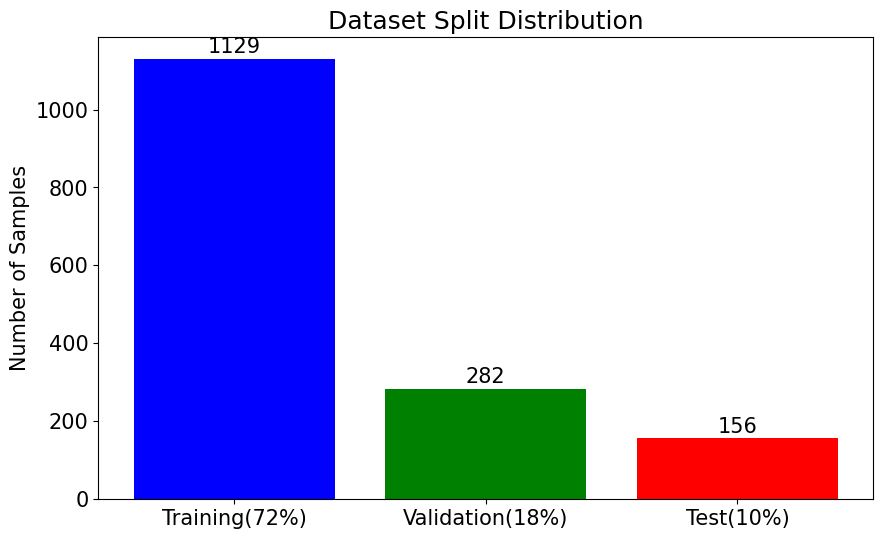

In [52]:
# 데이터셋 생성
class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
    def __len__(self):
        return len(self.dataframe)
    def __getitem__(self, idx):
        return self.dataframe.iloc[idx]
df_shuffled = df_data.sample(frac=1).reset_index(drop=True)
torch_dataset = DataFrameDataset(df_shuffled)
total_size = len(torch_dataset) ## 전체 데이터셋의 크기
# 테스트 데이터셋(전체의 10%)
test_size = int(0.1 * total_size) ## 테스트 세트 크기 설정 
train_val_size = total_size - test_size ## 훈련 및 검증 세트 크기 설정, test_size를 제외한 나머지
train_val_dataset, test_dataset = random_split(torch_dataset, [train_val_size, test_size])
# 검증 데이터셋 
val_size = int(0.2 * train_val_size) ## 검증 세트 크기 설정 (훈련 세트의 20%)
train_size = train_val_size - val_size
# 훈련 및 검증 세트 분할
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])
# 데이터셋 크기를 리스트로 정의
dataset_labels = ['Training(72%)', 'Validation(18%)', 'Test(10%)']
# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(dataset_labels, [train_size, val_size, test_size], color=['blue', 'green', 'red'])
# 그래프 제목 및 레이블 설정
plt.title('Dataset Split Distribution')
plt.ylabel('Number of Samples')
# 각 막대에 데이터 수 표시
for i, size in enumerate([train_size, val_size, test_size]):
    plt.text(i, size + 5, str(size), ha='center', va='bottom')
# 그래프 표시
plt.show()

#### 데이터 구분 별 데이터 분포 히스토그램

- 일반화 성능을 올바르게 평가하기 위해, train, val, test 데이터 셋의 분포를 확인

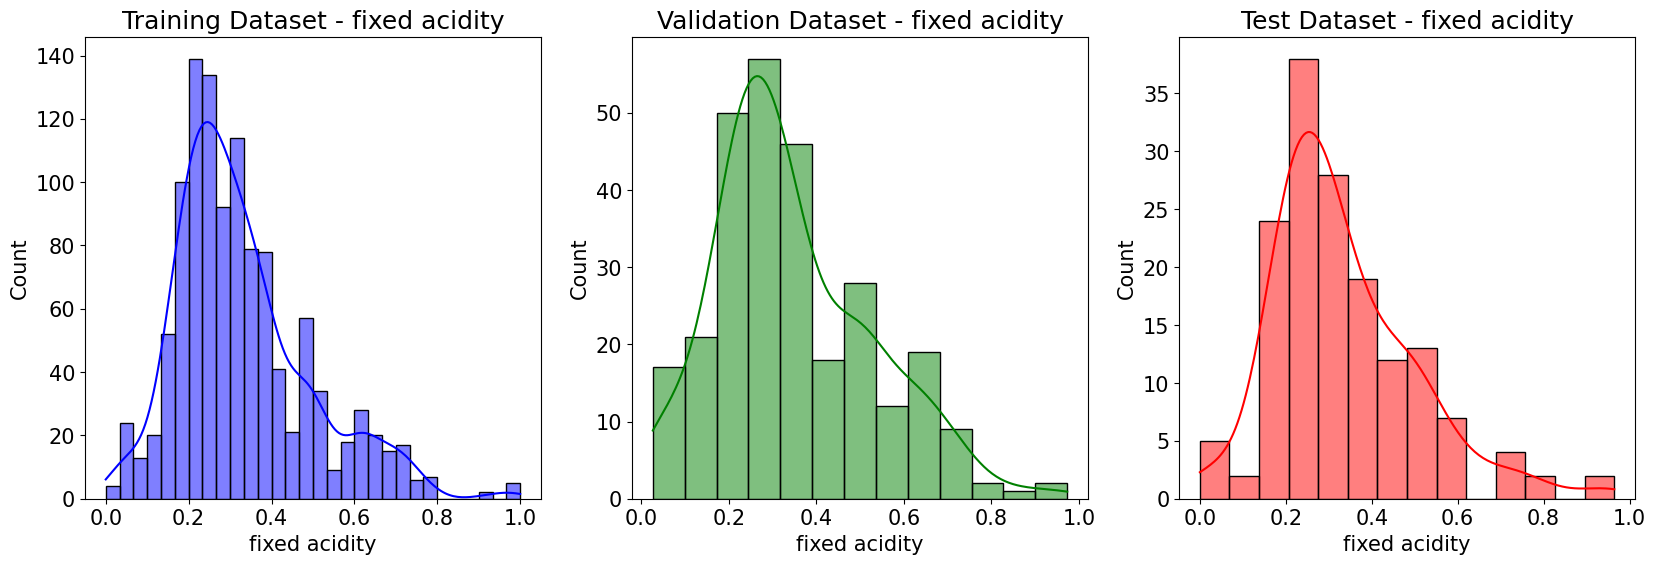

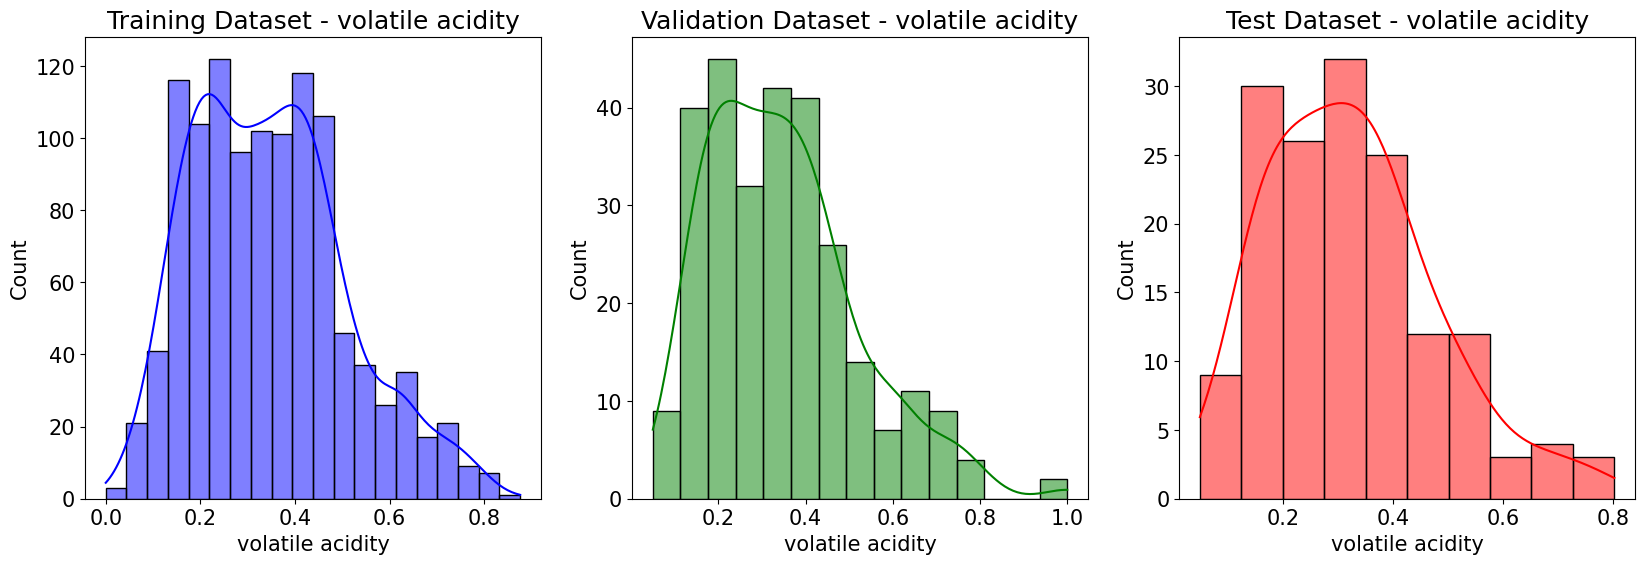

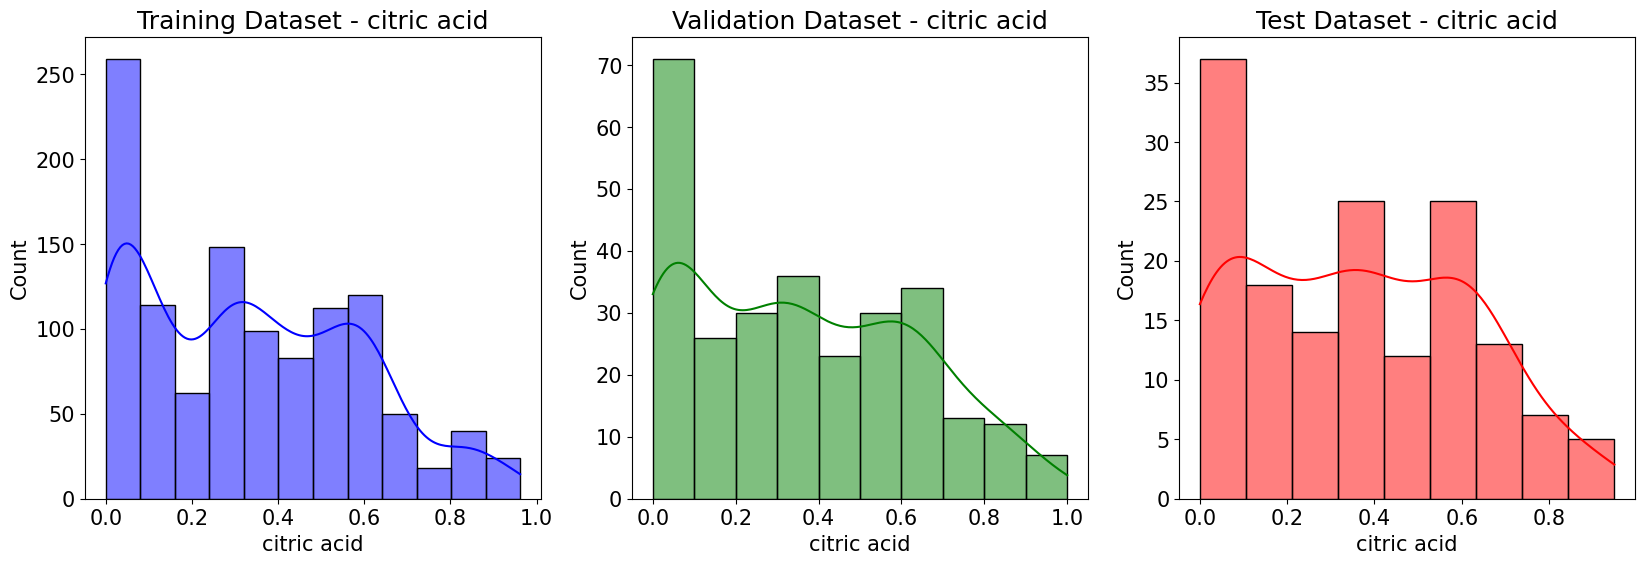

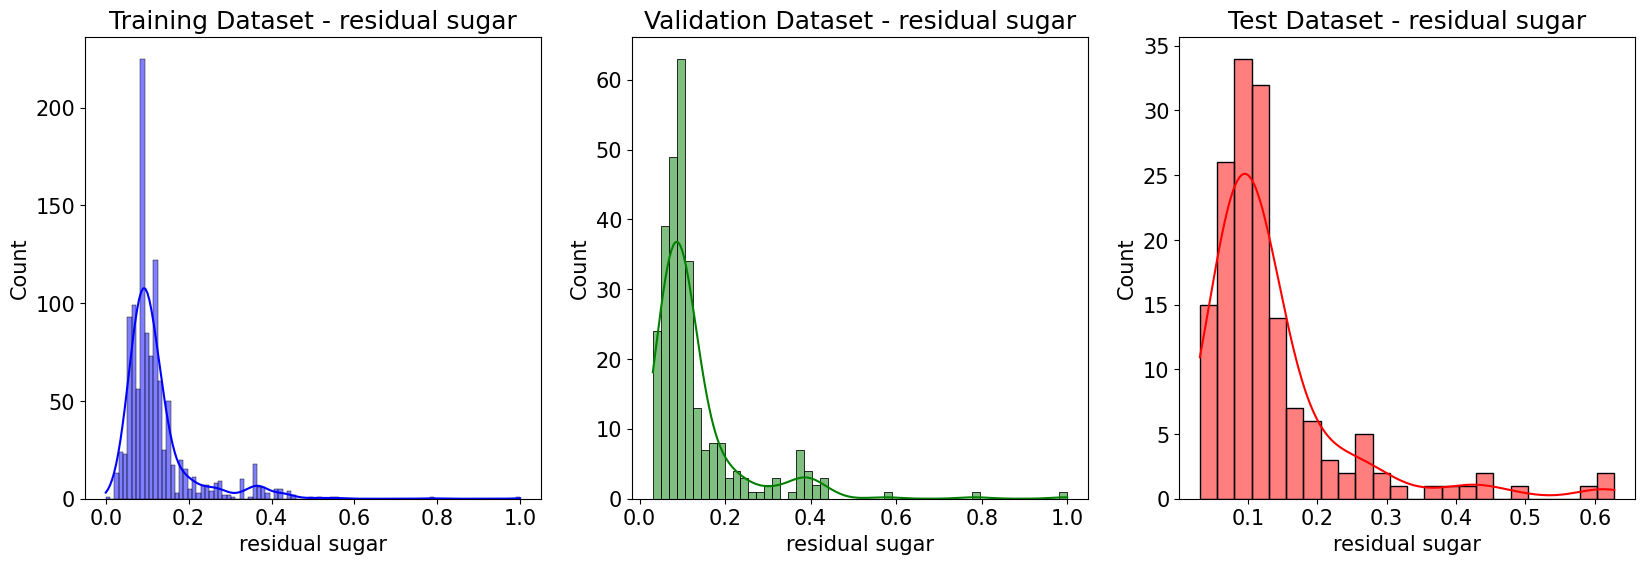

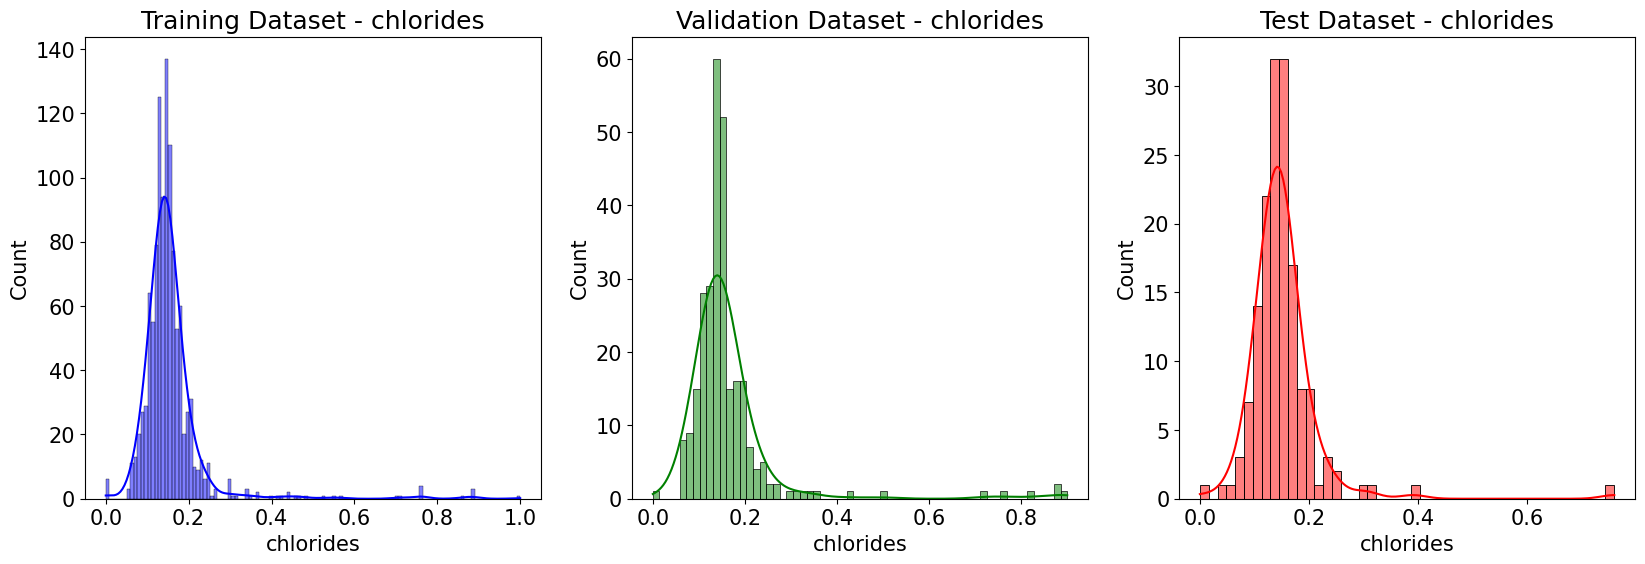

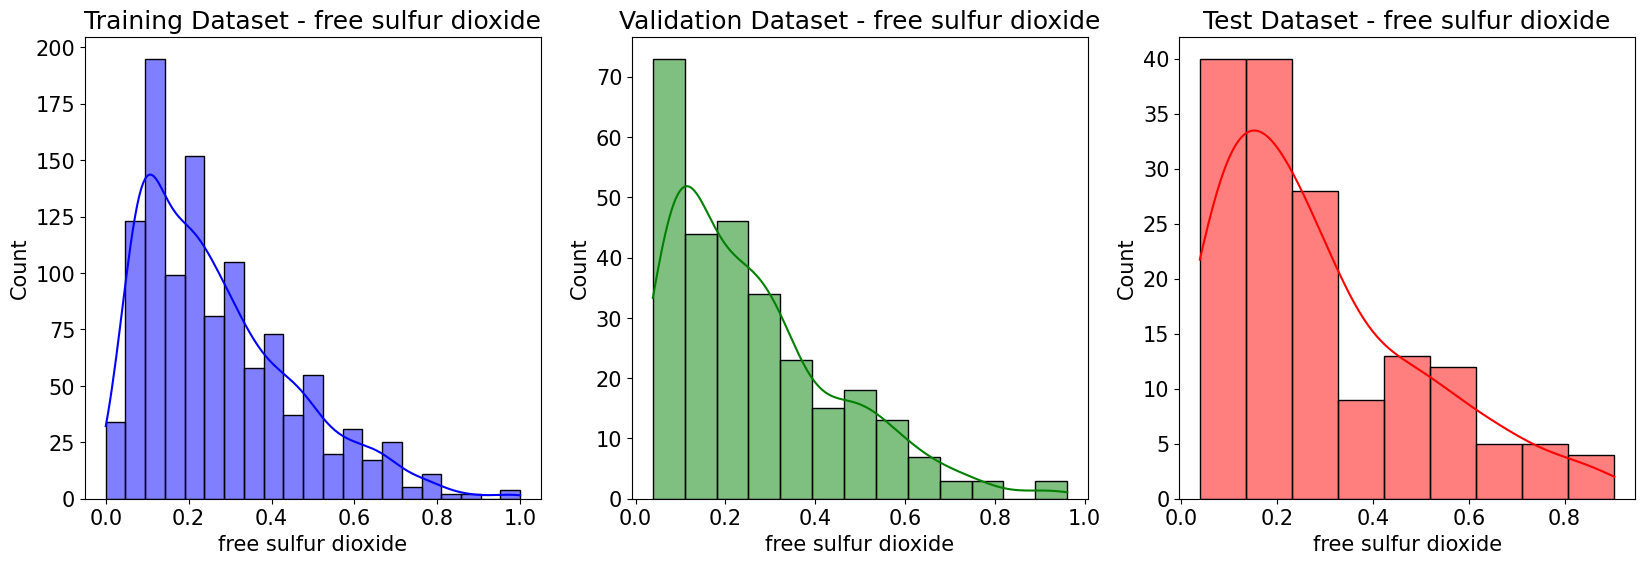

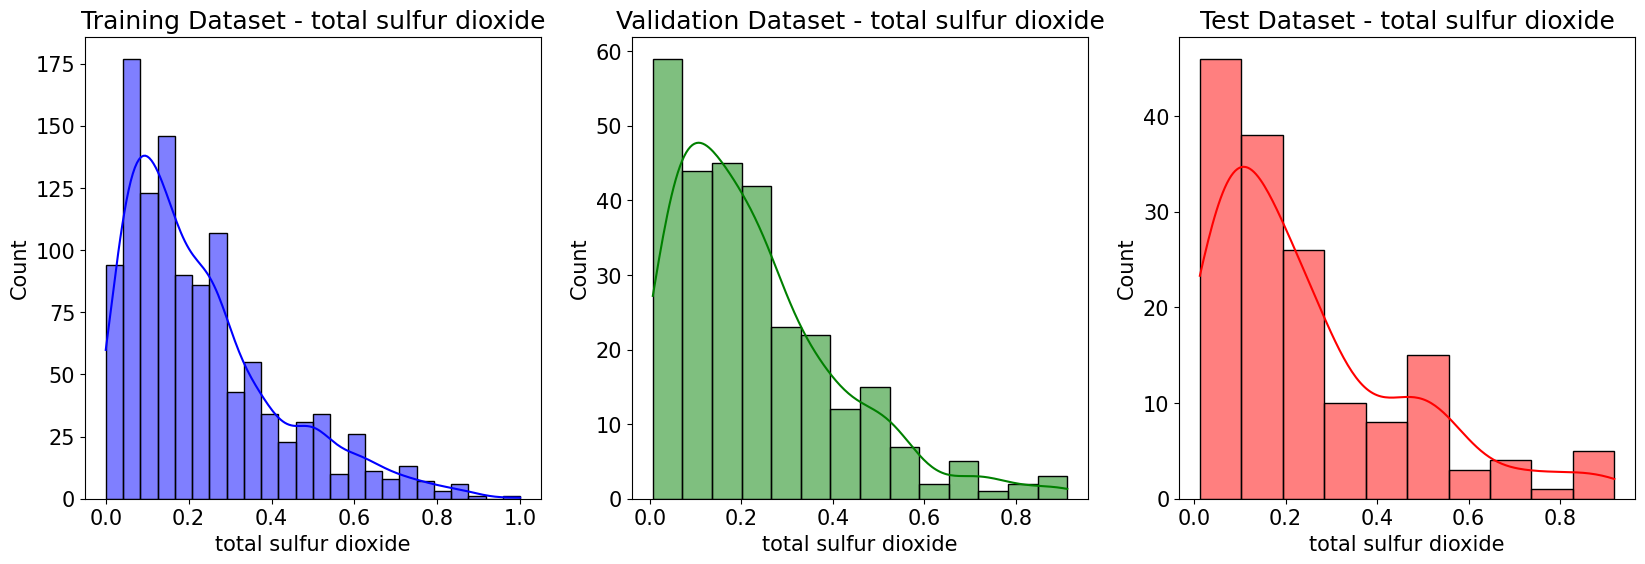

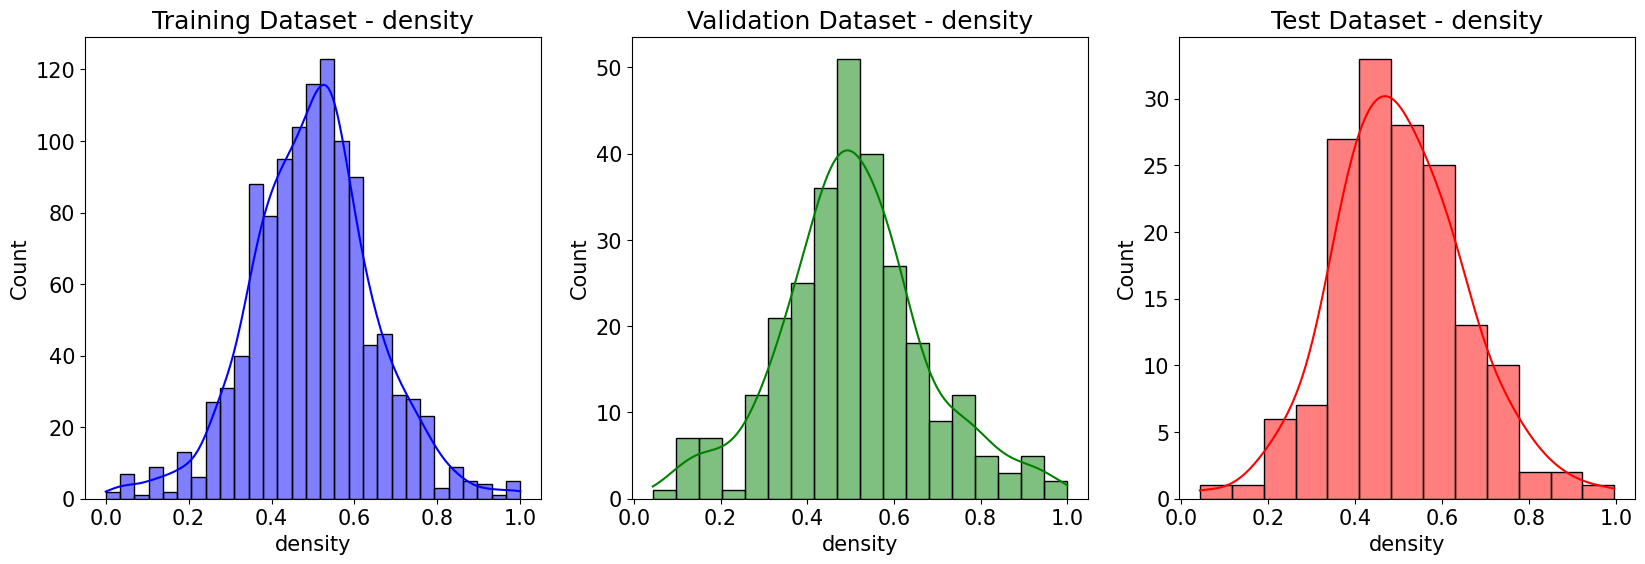

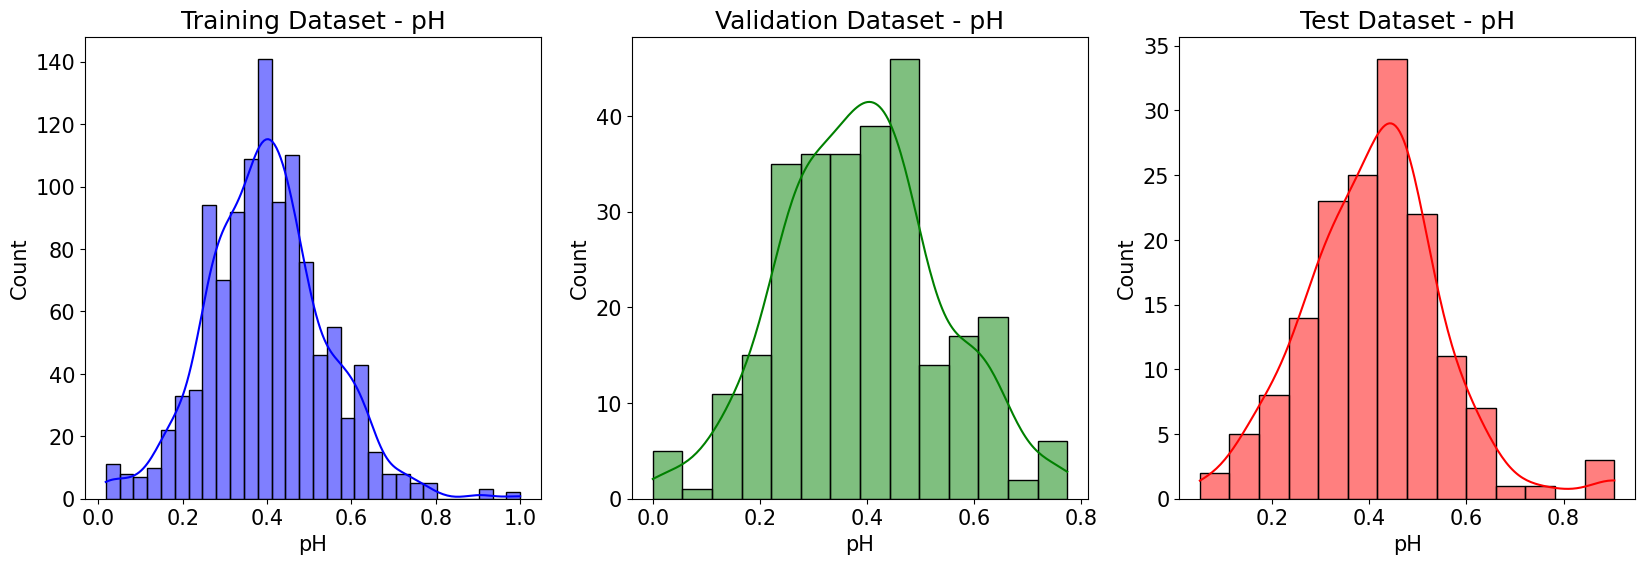

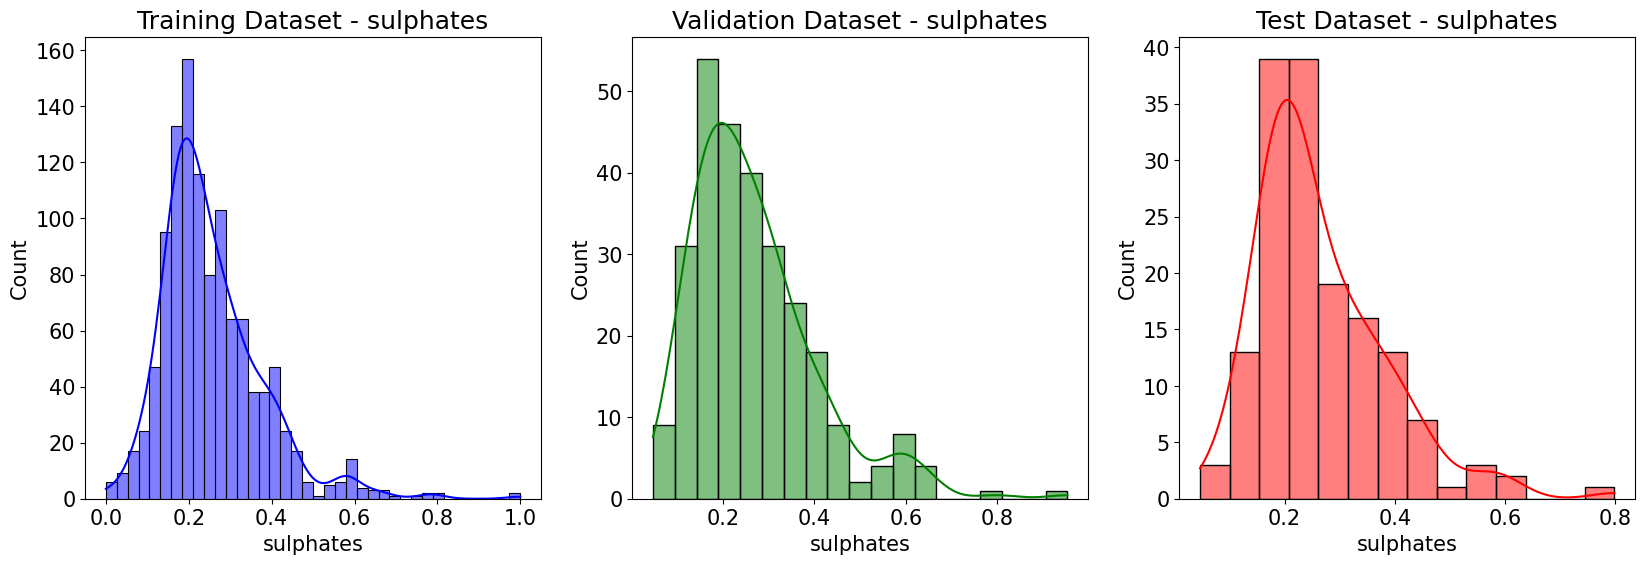

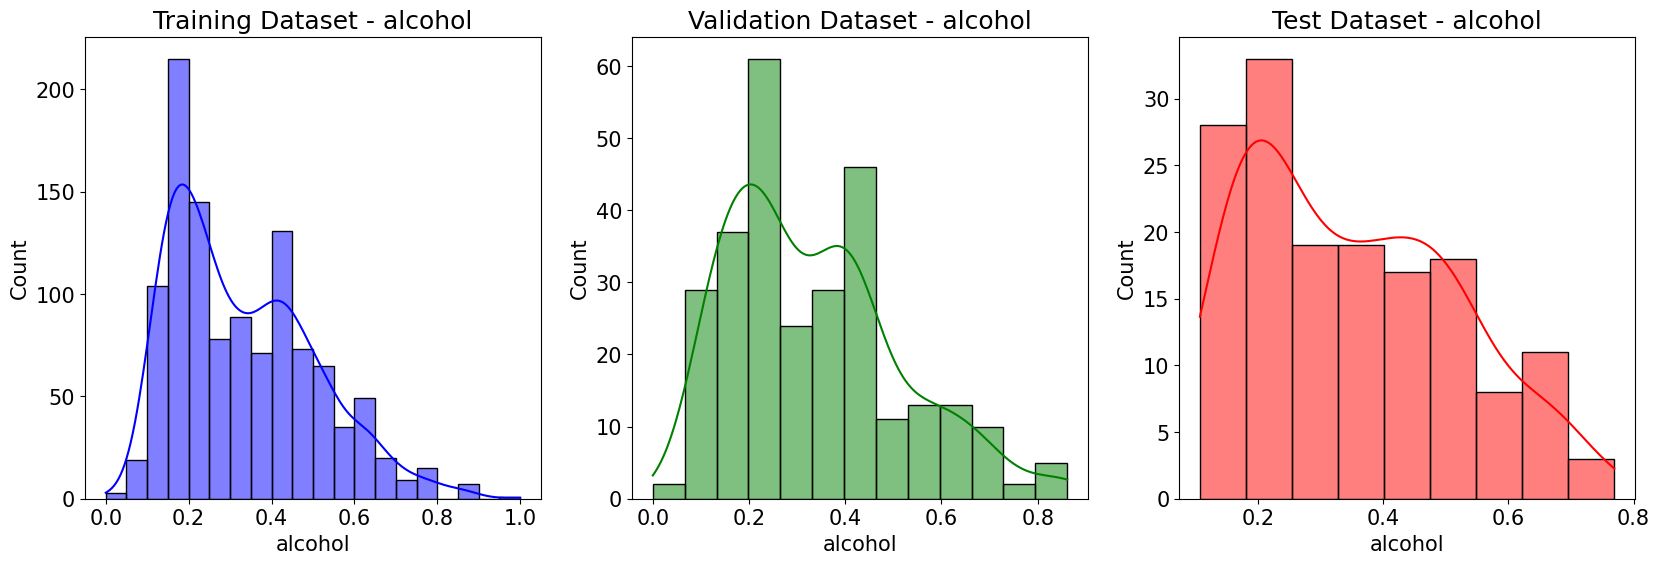

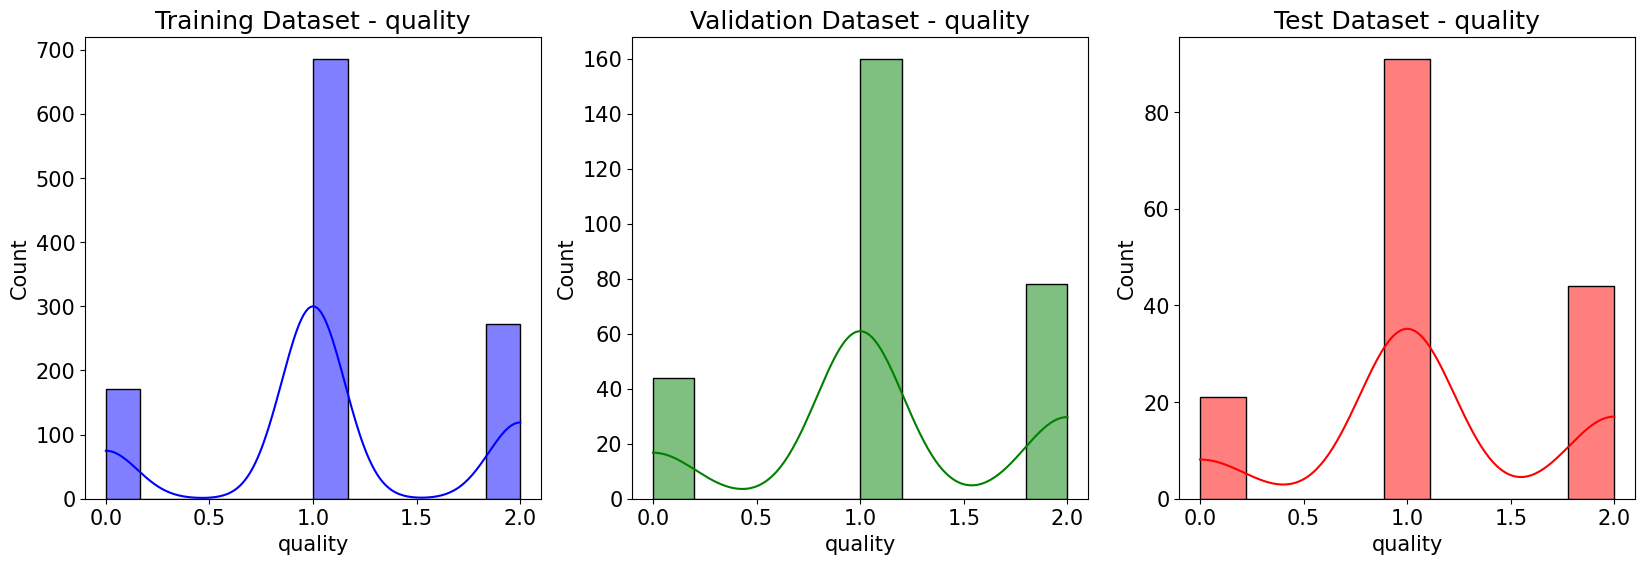

In [53]:
# DataFrameDataset을 Pandas DataFrame으로 변환
df_train = pd.DataFrame([train_dataset[i] for i in range(len(train_dataset))])
df_val = pd.DataFrame([val_dataset[i] for i in range(len(val_dataset))])
df_test = pd.DataFrame([test_dataset[i] for i in range(len(test_dataset))])

# 변수 리스트
variables = df_train.columns

# 각 변수에 대한 히스토그램 생성
for variable in variables:
    plt.figure(figsize=(20, 6))

    # 훈련 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 1)
    sns.histplot(df_train[variable], color='blue', kde=True)
    plt.title(f'Training Dataset - {variable}')

    # 검증 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 2)
    sns.histplot(df_val[variable], color='green', kde=True)
    plt.title(f'Validation Dataset - {variable}')

    # 테스트 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 3)
    sns.histplot(df_test[variable], color='red', kde=True)
    plt.title(f'Test Dataset - {variable}')

    plt.show()


### Model Construction
- 드롭아웃과 배치 정규화 적용

In [54]:
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

### Train Model & Select Model

**학습 설정**
중복 데이터가 다수 있음으로, 과적합에 안전하도록 설정해야 한다.

In [55]:
#batch_size = 16 ## 과소 적힙
batch_size = 32 
#batch_size = 64 ## 과적합

learning_rate = 0.001

num_epochs = 400
#num_epochs = 450 ## 과적합
#num_epochs = 500 ## 과적합

hidden_size = 64
#hidden_size = 128 ## 과적합
#hidden_size = 512 ## 과적합
#hidden_size = 768 ## 과적합 

In [56]:


# 특성과 라벨 분리
train_features = torch.tensor(df_train.iloc[:, :-1].values, dtype=torch.float32)
train_labels = torch.tensor(df_train.iloc[:, -1].values, dtype=torch.long)
val_features = torch.tensor(df_val.iloc[:, :-1].values, dtype=torch.float32)
val_labels = torch.tensor(df_val.iloc[:, -1].values, dtype=torch.long)
test_features = torch.tensor(df_test.iloc[:, :-1].values, dtype=torch.float32)
test_labels = torch.tensor(df_test.iloc[:, -1].values, dtype=torch.long)

# 데이터 배치 설정
train_tensor_dataset = TensorDataset(train_features, train_labels)
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_tensor_dataset = TensorDataset(val_features, val_labels)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size)
test_tensor_dataset = TensorDataset(test_features, test_labels)
test_loader = DataLoader(test_tensor_dataset, batch_size=batch_size)

# DNN 설정
dnn_model = DNN(input_size=11, hidden_size=hidden_size, num_classes=6) 
mlp_model = MLP(input_size=11, hidden_size=hidden_size, num_classes=6) 

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
dnn_optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)
mlp_optimizer = torch.optim.Adam(mlp_model.parameters(), lr=learning_rate)

def fit(model, train_loader, val_loader, optimizer, num_epochs, criterion):
    # 손실과 정확도를 저장할 리스트 초기화
    train_losses = []
    val_accuracies = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for i, (features, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 에포크당 평균 손실 계산 및 저장
        epoch_loss /= len(train_loader)
        train_losses.append(epoch_loss)

        # 모델 검증
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in val_loader:
                outputs = model(features)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # 에포크당 정확도 계산 및 저장
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy}%')
    return train_losses, val_accuracies
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy}%')
    return test_accuracy

In [57]:
# dnn
train_losses_for_dnn, val_accuracies_for_dnn = fit(dnn_model, train_loader, val_loader, dnn_optimizer, num_epochs, criterion)

Epoch [1/400], Loss: 1.4499, Validation Accuracy: 57.4468085106383%
Epoch [2/400], Loss: 1.0370, Validation Accuracy: 68.43971631205673%
Epoch [3/400], Loss: 0.8847, Validation Accuracy: 70.92198581560284%
Epoch [4/400], Loss: 0.8095, Validation Accuracy: 72.69503546099291%
Epoch [5/400], Loss: 0.8038, Validation Accuracy: 72.69503546099291%
Epoch [6/400], Loss: 0.7501, Validation Accuracy: 73.75886524822695%
Epoch [7/400], Loss: 0.7269, Validation Accuracy: 74.822695035461%
Epoch [8/400], Loss: 0.7248, Validation Accuracy: 75.177304964539%
Epoch [9/400], Loss: 0.7334, Validation Accuracy: 73.75886524822695%
Epoch [10/400], Loss: 0.7243, Validation Accuracy: 75.53191489361703%
Epoch [11/400], Loss: 0.7188, Validation Accuracy: 75.177304964539%
Epoch [12/400], Loss: 0.6943, Validation Accuracy: 74.11347517730496%
Epoch [13/400], Loss: 0.6939, Validation Accuracy: 75.88652482269504%
Epoch [14/400], Loss: 0.6780, Validation Accuracy: 74.46808510638297%
Epoch [15/400], Loss: 0.6706, Valida

Test Accuracy: 88.46153846153847%


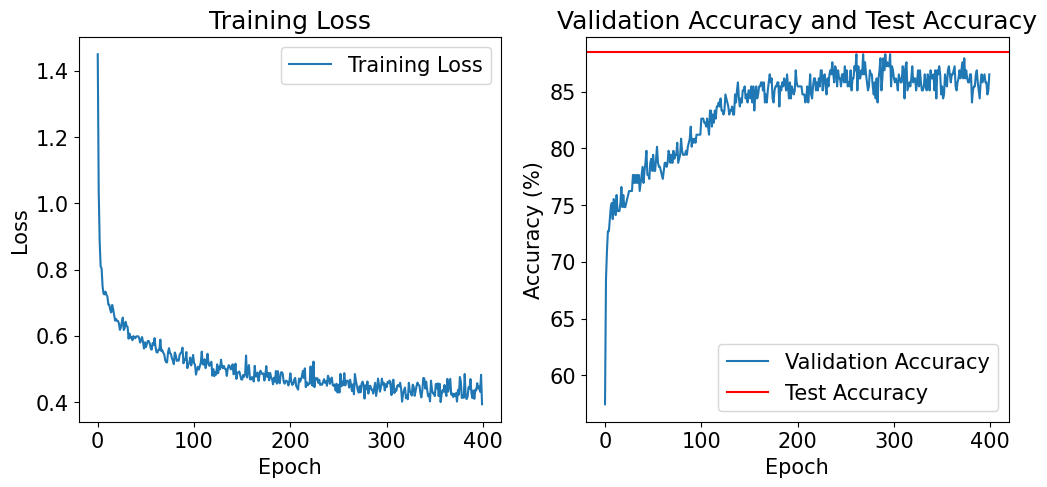

In [58]:
# 테스트 데이터셋 평가
test_accuracy1 = evaluate_model(dnn_model, test_loader)

# 학습 및 검증 및 테스트 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_for_dnn, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies_for_dnn, label='Validation Accuracy')
plt.axhline(y=test_accuracy1, color='r', linestyle='-', label='Test Accuracy') # 테스트 정확도 추가
plt.title('Validation Accuracy and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [59]:
# mlp
train_losses_for_mlp, val_accuracies_for_mlp = fit(mlp_model, train_loader, val_loader, mlp_optimizer, num_epochs, criterion)

Epoch [1/400], Loss: 1.7460, Validation Accuracy: 56.737588652482266%
Epoch [2/400], Loss: 1.6032, Validation Accuracy: 56.737588652482266%
Epoch [3/400], Loss: 1.4636, Validation Accuracy: 56.737588652482266%
Epoch [4/400], Loss: 1.4038, Validation Accuracy: 56.737588652482266%
Epoch [5/400], Loss: 1.3859, Validation Accuracy: 56.737588652482266%
Epoch [6/400], Loss: 1.3754, Validation Accuracy: 56.737588652482266%
Epoch [7/400], Loss: 1.3639, Validation Accuracy: 56.737588652482266%
Epoch [8/400], Loss: 1.3541, Validation Accuracy: 56.737588652482266%
Epoch [9/400], Loss: 1.3468, Validation Accuracy: 56.737588652482266%
Epoch [10/400], Loss: 1.3344, Validation Accuracy: 56.737588652482266%
Epoch [11/400], Loss: 1.3251, Validation Accuracy: 56.737588652482266%
Epoch [12/400], Loss: 1.3181, Validation Accuracy: 56.737588652482266%
Epoch [13/400], Loss: 1.3116, Validation Accuracy: 56.737588652482266%
Epoch [14/400], Loss: 1.3072, Validation Accuracy: 56.737588652482266%
Epoch [15/400],

Test Accuracy: 58.333333333333336%


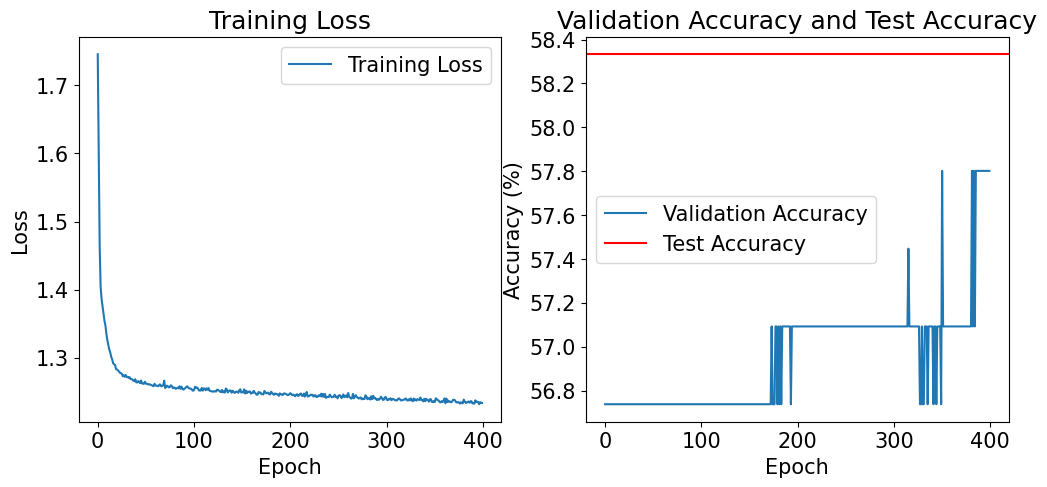

In [60]:
# 테스트 데이터셋 평가
test_accuracy2 = evaluate_model(mlp_model, test_loader)

# 학습 및 검증 및 테스트 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_for_mlp, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies_for_mlp, label='Validation Accuracy')
plt.axhline(y=test_accuracy2, color='r', linestyle='-', label='Test Accuracy') # 테스트 정확도 추가
plt.title('Validation Accuracy and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
            

`DNN 모델이 MLP 모델 보다 더 높은 성능을 보인다.`

---

## Performance

#### DNN 모델 평가
DNN 모델은 테스트 데이터셋에서 88%의 정확도를 보였습니다.

#### MLP 모델 평가
MLP 모델은 테스트 데이터셋에서 58%의 정확도를 보였고, DNN 모델에 비해 매우 낮은 성능을 보였습니다.

#### 결론
데이터 전처리 없이 기존 선행 연구자의 결과에 따르면 `랜덤포레스트는 0.671875, 의사결정나무는 0.596875의 정확도`를 보였습니다.

본 프로젝트를 통해, `적절한 전처리와 모델 튜닝이 성능향상에 큰 기여`를 한다는 것을 확인할 수 있었고, 성능지표로 부터 얻을 수 있는 결론은 다음과 같습니다.

`1. 클래스 불균형을 고려한 데이터 전처리가 모델 성능 향상에 큰기여를 했다는 것입니다.`  

`2. 적절히 같은 전처리라도 잘 튜닝된 DNN 모델이 다른 모델에 비해 와인 품질 예측에 더 뛰어난 성능을 보인다는 것입니다.`  

서두에서 언급한 연구 문제를 논리적으로 다시 정리하면 다음과 같습니다.

#### 1. **변수 값의 범위가 서로 다른 변수 처리리**: 12개의 화학적 변수가 와인의 품질에 미치는 영향을 분석하고, 이를 효과적으로 모델에 통합하는 방법은 무엇인가?
   - 변수의 이상치를 제거하고 Min-Max 정규화를 적용하여 변수를 전처리하는 방법을 고려해야 한다.

#### 2. **최적의 딥러닝 모델 구조와 하이퍼파라미터 설정**: 와인 품질을 예측하는데 가장 적합한 딥러닝 모델 구조와 하이퍼파라미터는 무엇인가?
   - 배치 크기, 학습률, 에폭 수, 은닉층 크기 등의 하이퍼파라미터 설정을 최적화하여 모델을 튜닝해야 한다.  
      batch_size = 32  
      learning_rate = 0.001  
      num_epochs = 400  
      hidden_size = 64  

#### 3. **클래스의 분균질을 고려한 데이터 전처리**: 와인의 품질 분포가 훌륭한 와인보다 평범한 와인에 치우쳐 있으므로, 이러한 불균형을 어떻게 처리할 것인가?
   - 낮은 품질 와인이 높은 품질의 와인으로 잘못 예측되는 것을 줄이기 위해 적은 데이터의 오버샘플링 기법을 고려해야 한다.

#### 정리
`데이터 전처리 및 클래스 불균형 처리가 모델 성능 향상에 기여하며, 잘 튜닝된 DNN 모델이 와인 품질 예측에 더 뛰어난 성능을 보인다는 것입니다.`

  